In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')

In [10]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
cars = pd.read_csv('C:\works\hong_big\car_evaluation.csv', names=cols, header=None)
cars.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<AxesSubplot:ylabel='output'>

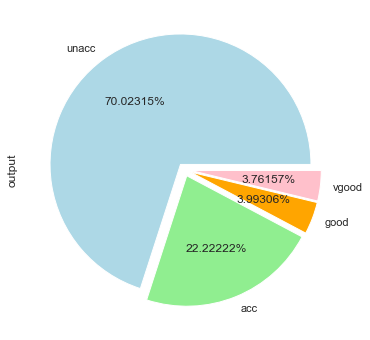

In [11]:
plot_size = plt.rcParams['figure.figsize']
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams['figure.figsize'] = plot_size
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))

In [12]:
price = pd.get_dummies(cars.price, prefix='price')
price.head()

maint = pd.get_dummies(cars.maint, prefix='maint')
maint.head()

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
lug_capacity.head()

safety = pd.get_dummies(cars.output, prefix='condition')
safety.head()

labels = pd.get_dummies(cars.output, prefix='condition')
labels.head()

X = pd.concat([price, maint, lug_capacity, safety, labels], axis=1)
y = labels.values
# 레이블을 넘파이 배열로 변환

# get_dummies는 가변수로 만들어주는 메소드이다.
# 가변수로 만들어준다는 의미는 문자를 숫자 0, 1로 바꾸어주는 것으로 0은 없음, 1은 있음을 의미한다.
# 이때 get_dummies는 문자열 특성만 인코딩 되며 숫자 특성은 바뀌지 않는다.
# 여섯 개의 열을 병합하기 위해 concat() 메소드를 사용함
# concat() 메소드는 선택된 범위 여러 개 또는 텍스트 여러 개를 하나의 문자열로 결합함
X.head()

,price_high,price_low,price_med,price_vhigh,maint_high,maint_low,maint_med,maint_vhigh,lug_capacity_big,lug_capacity_med,lug_capacity_small,condition_acc,condition_good,condition_unacc,condition_vgood,condition_acc,condition_good,condition_unacc,condition_vgood
0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
2,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# train_test_split은 데이터 셋을 훈련용과 테스트용으로 분리하는 메소드임
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382 entries, 107 to 1126
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   price_high          1382 non-null   uint8
 1   price_low           1382 non-null   uint8
 2   price_med           1382 non-null   uint8
 3   price_vhigh         1382 non-null   uint8
 4   maint_high          1382 non-null   uint8
 5   maint_low           1382 non-null   uint8
 6   maint_med           1382 non-null   uint8
 7   maint_vhigh         1382 non-null   uint8
 8   lug_capacity_big    1382 non-null   uint8
 9   lug_capacity_med    1382 non-null   uint8
 10  lug_capacity_small  1382 non-null   uint8
 11  condition_acc       1382 non-null   uint8
 12  condition_good      1382 non-null   uint8
 13  condition_unacc     1382 non-null   uint8
 14  condition_vgood     1382 non-null   uint8
 15  condition_acc       1382 non-null   uint8
 16  condition_good      1382 non-null   uint

In [14]:
# df_train, df_test = train_test_split(df, test_size=0.4, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5)
# X_train.info()

# test size : 테스트 셋의 비율을 나타낸다.
# random state : 데이터 셋을 섞을 때 해당 값을 참조하여 섞는다. 하이퍼파라미터 튜닝을 할 때 이 값을 고정해 두어야 매번 데이터 셋이 변경되는 것을 방지할 수 있다.

In [15]:
import math

def sigmoid(x, deff=False):
  if deff:
    return sigmoid(x)*(1-sigmoid(x))
  else:
    return 1 / (1 + math.exp(-x))


In [16]:
# 모델 생성

from tensorflow.keras.layers import Input, Dense, Activation, Dropout
# 케라스 API를 이용하여 input, activation, drop 클래스를 호출

from tensorflow.keras.models import Model
# 케라스 API를 이용하여 Model 클래스 호출

input_layer = Input(shape = (X.shape[1],))

dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs = input_layer, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()


# model.summary() 결과에서 확인할 수 있는 것처럼 모델은 밀집층(혹은 완전연결층이라고 함)이 총 세 개로 구성되어 있음
# 처음 두 개는 각각 relu 활성화 함수를 사용하는 노드 15개와 노드 10개로 구성되어 있음
# 손실 함수로 categorical_crossentropy를 사용하며, 옵티마이저는 adam을 사용함
# 참고) sparse_categorical_crossentropy와 categorical_crossentropy 모두 다중 분류에 대한 손실 함수로 사용함
# categorical_crossentropy의 출력 값은 원-핫 인코딩된 결과가 출력되지만, sparse_categorical_crossentropy는 정수 형태(원-핫 인코딩하지 않은 정수형태)로 출력됨


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 19)]              0         
_________________________________________________________________
dense (Dense)                (None, 15)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 504
Trainable params: 504
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 모델 훈련

history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)


# batch는 모델 가중치를 한 번 업데이트 시킬 때 사용되는 데이터의 묶음임
# 예를 들어 train data가 총 1000개 일 때, batch size가 20이라면 데이터 20개마다 모델 가중치를 업데이트한다.
# 즉 가중치가 총 50번 업데이트 되기 때문에 하나의 데이터 셋을 배치 50개로 나누어 훈련을 진행한다고 이해하면 됨
# 예를 들어 에포크가 10이고 batch size가 20이면 가중치를 50번 업데이트하는 것을 총 10번 반복한다는 뜻임
# 각 데이터가 총 열 번씩 사용되고 결과적으로 가중치가 총 500번 업데이트 된다고 이해하면 됨

Epoch 1/50
139/139 [==============================] - 1s 6ms/step - loss: 0.8355 - acc: 0.7538 - val_loss: 0.5209 - val_acc: 0.8231
Epoch 2/50
139/139 [==============================] - 1s 6ms/step - loss: 0.2532 - acc: 0.9620 - val_loss: 0.1635 - val_acc: 0.9711
Epoch 3/50
139/139 [==============================] - 1s 6ms/step - loss: 0.0790 - acc: 0.9928 - val_loss: 0.0605 - val_acc: 1.0000
Epoch 4/50
139/139 [==============================] - 1s 4ms/step - loss: 0.0305 - acc: 1.0000 - val_loss: 0.0258 - val_acc: 1.0000
Epoch 5/50
139/139 [==============================] - 0s 3ms/step - loss: 0.0138 - acc: 1.0000 - val_loss: 0.0132 - val_acc: 1.0000
Epoch 6/50
139/139 [==============================] - 1s 5ms/step - loss: 0.0077 - acc: 1.0000 - val_loss: 0.0079 - val_acc: 1.0000
Epoch 7/50
139/139 [==============================] - 1s 5ms/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 8/50
139/139 [==============================] - 1s 4ms/step - loss: 0.

In [18]:
# 모델 평가

score = model.evaluate(X_test, y_test, verbose=1)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

# 성능 평가 지표로 정확도(accuracy), 재현율(recall), 정밀도(precision), F1-스코어가 있음 

11/11 [==============================] - 0s 2ms/step - loss: 1.8807e-05 - acc: 1.0000
Test Score:  1.880702984635718e-05
Test Accuracy:  1.0


In [19]:
'''
정확도(Accuracy)
- 전체 예측 건수에서 정답을 맞힌 건수의 비율
- 이때 맞힌 정답이 긍정이든 부정이든 상관없음
- 실제로 정답이 1이라고 할때  모델도 1로 예측한 비율
- 처음부터 데이터가 1일 확률이 적을 때 사용하면 좋음

정밀도(Precision))
- 모델이 1이라고 예측한 것 중에서 실제로 정답이 1인 비율

F1-스코어
- 일반적으로 precision(정밀도)와 recall(재현율)은 트레이드 오프 관계
- precision(정밀도)가 높으면 recall(재현율)이 낮고, recall(재현율)이 좋으면 precision(정밀도)가 낮다. (반의 상관관계)
- precision(정밀도)와 recall(재현율)의 조화평균을 이용한 것이 F1 스코어 평가임
'''




'\n정확도(Accuracy)\n- 전체 예측 건수에서 정답을 맞힌 건수의 비율\n- 이때 맞힌 정답이 긍정이든 부정이든 상관없음\n- 실제로 정답이 1이라고 할때  모델도 1로 예측한 비율\n- 처음부터 데이터가 1일 확률이 적을 때 사용하면 좋음\n\n정밀도(Precision))\n- 모델이 1이라고 예측한 것 중에서 실제로 정답이 1인 비율\n\nF1-스코어\n- 일반적으로 precision(정밀도)와 recall(재현율)은 트레이드 오프 관계\n- precision(정밀도)가 높으면 recall(재현율)이 낮고, recall(재현율)이 좋으면 precision(정밀도)가 낮다. (반의 상관관계)\n- precision(정밀도)와 recall(재현율)의 조화평균을 이용한 것이 F1 스코어 평가임\n'